# Lista 5

## scikit

(5pkt + 2pkt)

Na liście znajdują się 4 zadania. Po rozwiązaniu zadania pokaż kod prowadzącemu i odpowiedz na **pytanie kontrolne** — tylko wtedy przyznajemy punkty. Dodatkowo prześlij zadanie na platformie skos.

Zadania dodatkowe oznaczone są ⭐️. Za wykonanie każdego z nich otrzymasz 1pkt.
**Uwaga** jedno z zadań możliwe jest do wykonania tylko podczas pracowni!

## Intro: Regresja liniowa

Wygeneruj sztuczny zbiór danych regresyjnych za pomocą funkcji `make_regression(n_samples=200, n_features=1, noise=10)`. Następnie podziel dane na zbiór treningowy i testowy (`train_test_split`) i wykonaj regresję. Policz błędy modelu na zbiorze testowym.

Który z modeli regresji daje najlepsze wyniki? Porównaj trzy modele z wykładu.

MAE  (Mean Absolute Error): 9.7
MSE  (Mean Squared Error): 156.25
MAE Lasso: 9.56
MSE Lasso: 155.76
MAE Ridge 9.62
MSE Ridge 155.68


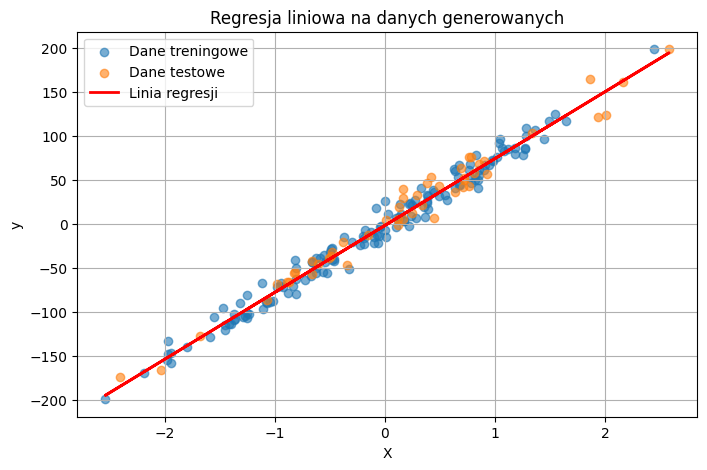

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Generowanie danych
X, y = make_regression(n_samples=200, n_features=1, noise=10)

# 2. Podział danych
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 3. Model regresji liniowej
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

model_lasso = Lasso(alpha=1.0)   # alpha controls regularization strength
model_lasso.fit(X_train, y_train)

model_ridge = Ridge(alpha=1.0)   # alpha controls regularization strength
model_ridge.fit(X_train, y_train)

# 4. Predykcje
y_pred_reg = model_reg.predict(X_test)

# 5. Błędy regresji
mae = mean_absolute_error(y_test, y_pred_reg)
mse = mean_squared_error(y_test, y_pred_reg)

print("MAE  (Mean Absolute Error):", round(mae, 2))
print("MSE  (Mean Squared Error):", round(mse, 2))

print("MAE Lasso:", round(mean_absolute_error(y_test, model_lasso.predict(X_test)), 2))
print("MSE Lasso:", round(mean_squared_error(y_test, model_lasso.predict(X_test)), 2))

print("MAE Ridge", round(mean_absolute_error(y_test, model_ridge.predict(X_test)), 2))
print("MSE Ridge", round(mean_squared_error(y_test, model_ridge.predict(X_test)), 2))

# 6. Wykres: dane + linia regresji
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, alpha=0.6, label="Dane treningowe")
plt.scatter(X_test, y_test, alpha=0.6, label="Dane testowe")
plt.plot(X, model_reg.predict(X), color='red', linewidth=2, label="Linia regresji")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Regresja liniowa na danych generowanych")
plt.legend()
plt.grid(True)
plt.show()


## Rozpoznawanie ręcznie pisanych cyfr

Celem zadania jest klasyfikacja obrazów cyfr 0–9 i eksperymentowanie z parametrami klasyfikatora **SVC (Support Vector Classifier)**. W tym zadaniu będziesz pracować na zbiorze **Digits** z pakietu `sklearn`, który zawiera obrazy 8×8 pikseli wraz z prawdziwymi etykietami cyfr.

Najpierw wyświetl kilka przykładów obrazów, aby zobaczyć strukturę danych. Następnie spłaszcz obrazy 8×8 do wektorów długości 64 (`numpy.reshape` na `digits.images`) i podziel dane na zbiór treningowy i testowy.

Twoim zadaniem jest przetestowanie SVC z kilkoma (trzy wystarczą) różnymi parametrami (`C`, `gamma`) w celu znalezienia najlepszego zestawu dla tego zbioru. Dla każdej konfiguracji:

1. Przeprowadź trenowanie na zbiorze treningowym,
2. Wykonaj predykcję na zbiorze testowym,
3. Oblicz dokładność (`metrics.accuracy_score`) oraz wyświetl `metrics.classification_report`,
4. Narysuj **confusion matrix** (`metrics.ConfusionMatrixDisplay.from_predictions`).

Na końcu podsumuj:

* który zestaw parametrów dał najlepszą dokładność,
* które cyfry były najczęściej mylone,
* czy zwiększenie `C` lub zmiana `gamma` poprawiło wyniki.


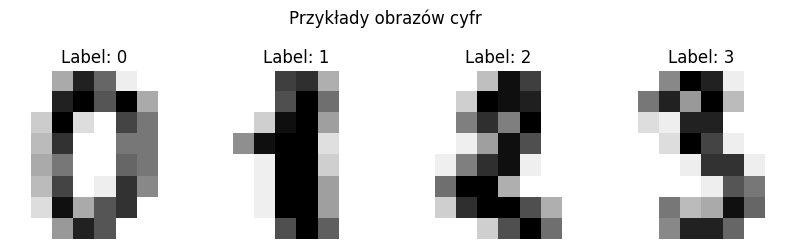

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


--- SVC (C=100000.0, gamma=0.1) ---
Accuracy: 0.1012
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        88
           1       0.00      0.00      0.00        91
           2       0.00      0.00      0.00        86
           3       0.10      1.00      0.18        91
           4       0.00      0.00      0.00        92
           5       0.00      0.00      0.00        91
           6       0.00      0.00      0.00        91
           7       0.00      0.00      0.00        89
           8       0.00      0.00      0.00        88
           9       0.00      0.00      0.00        92

    accuracy                           0.10       899
   macro avg       0.01      0.10      0.02       899
weighted avg       0.01      0.10      0.02       899



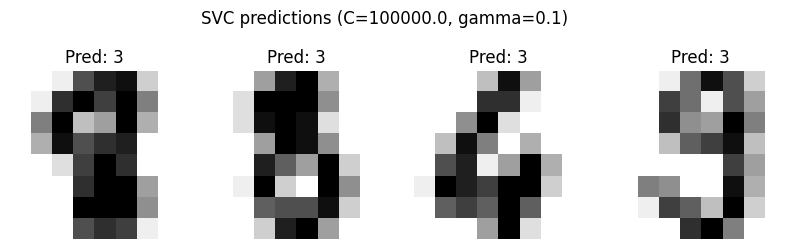

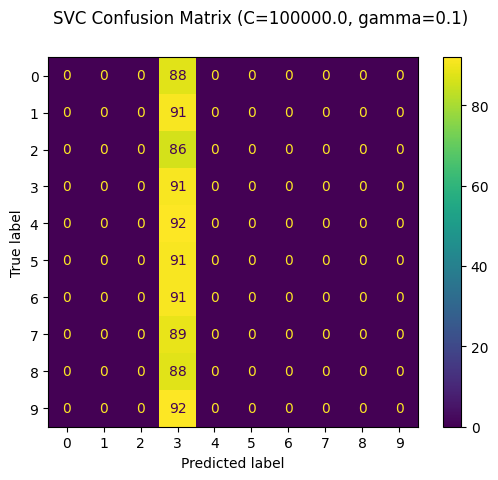

--- SVC (C=100000.0, gamma=0.01) ---
Accuracy: 0.7063
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        88
           1       1.00      0.74      0.85        91
           2       1.00      0.65      0.79        86
           3       1.00      0.65      0.79        91
           4       1.00      0.58      0.73        92
           5       0.94      0.98      0.96        91
           6       1.00      0.70      0.83        91
           7       1.00      0.49      0.66        89
           8       0.25      1.00      0.41        88
           9       1.00      0.61      0.76        92

    accuracy                           0.71       899
   macro avg       0.92      0.71      0.76       899
weighted avg       0.92      0.71      0.76       899



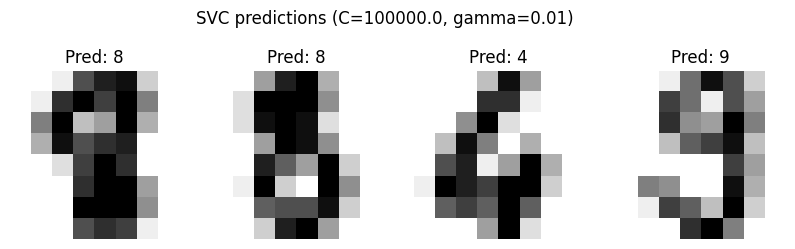

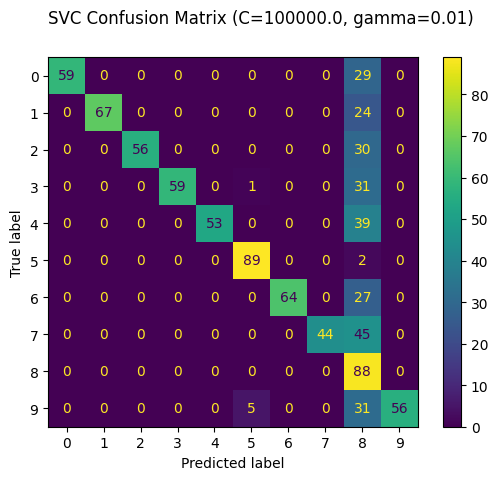

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


--- SVC (C=10000.0, gamma=0.1) ---
Accuracy: 0.1012
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        88
           1       0.00      0.00      0.00        91
           2       0.00      0.00      0.00        86
           3       0.10      1.00      0.18        91
           4       0.00      0.00      0.00        92
           5       0.00      0.00      0.00        91
           6       0.00      0.00      0.00        91
           7       0.00      0.00      0.00        89
           8       0.00      0.00      0.00        88
           9       0.00      0.00      0.00        92

    accuracy                           0.10       899
   macro avg       0.01      0.10      0.02       899
weighted avg       0.01      0.10      0.02       899



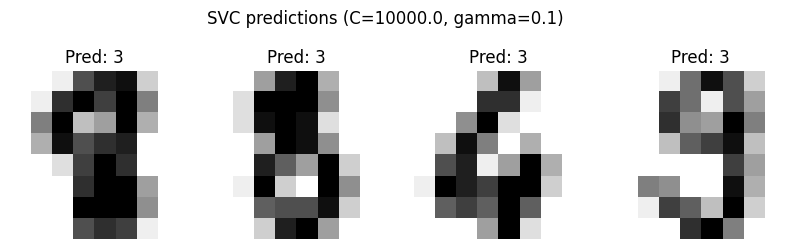

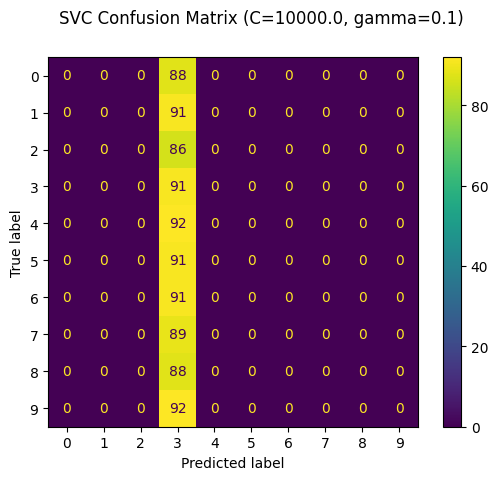

--- SVC (C=10000.0, gamma=0.01) ---
Accuracy: 0.7063
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        88
           1       1.00      0.74      0.85        91
           2       1.00      0.65      0.79        86
           3       1.00      0.65      0.79        91
           4       1.00      0.58      0.73        92
           5       0.94      0.98      0.96        91
           6       1.00      0.70      0.83        91
           7       1.00      0.49      0.66        89
           8       0.25      1.00      0.41        88
           9       1.00      0.61      0.76        92

    accuracy                           0.71       899
   macro avg       0.92      0.71      0.76       899
weighted avg       0.92      0.71      0.76       899



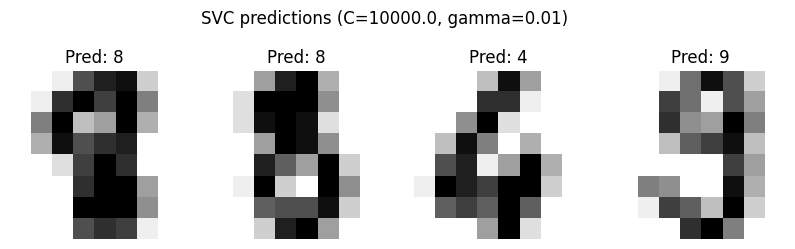

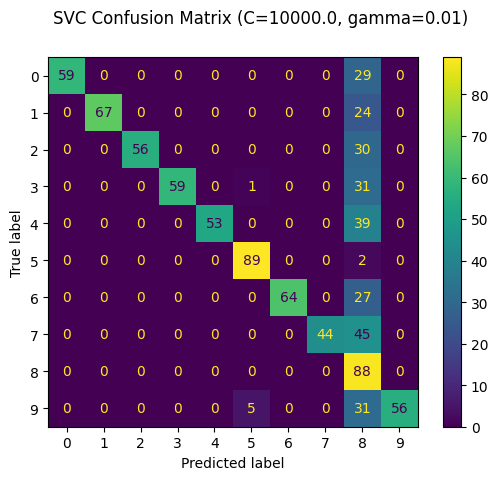

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

# --- 1. Wczytaj dataset ---
digits = datasets.load_digits()
n_samples = len(digits.images)

# --- 2. Wizualizacja kilku obrazów ---
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")
plt.suptitle("Przykłady obrazów cyfr")
plt.show()

# --- 3. Spłaszcz obrazy do wektorów ---
images = digits.images
data = images.reshape(len(images), -1)

# --- 4. Podział na zbiór treningowy i testowy ---
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# --- 5. Testowanie SVC z różnymi parametrami ---
svc_params = [
    {"C": 1e5, "gamma": 0.1, "kernel": "rbf"},
    {"C": 1e5, "gamma": 0.01, "kernel": "rbf"},
    {"C": 1e4, "gamma": 0.1, "kernel": "rbf"},
    {"C": 1e4, "gamma": 0.01, "kernel": "rbf"},
]

for params in svc_params:
    clf = svm.SVC(C=params["C"], gamma=params["gamma"])
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, predicted)
    classification_report = metrics.classification_report(y_test, predicted)
    print(f"--- SVC (C={params['C']}, gamma={params['gamma']}) ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report)

    # Wyświetlenie pierwszych 4 obrazów testowych z predykcjami
    _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
    for ax, image, prediction in zip(axes, X_test, predicted):
        ax.set_axis_off()
        image = image.reshape(8, 8)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(f"Pred: {prediction}")
    plt.suptitle(f"SVC predictions (C={params['C']}, gamma={params['gamma']})")
    plt.show()

    # Confusion matrix
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
    disp.figure_.suptitle(f"SVC Confusion Matrix (C={params['C']}, gamma={params['gamma']})")
    plt.show()

In [ ]:
najlepsze wyniki dla mniejszej gammy
najczęściej mylone 8

## Porównanie metod klastrowania

Celem zadania jest **porównanie różnych metod klasteryzacji** na prostych zbiorach danych.
Aby to umożliwić, przygotowano **trzy przykładowe datasety**, zróżnicowane pod względem struktury i trudności zadania:

1. **`blobs`** – zbiór punktów pogrupowanych w wyraźnie rozdzielone klastry (w miarę „idealny” przypadek klasteryzacji).
2. **`moons`** – dane w kształcie dwóch półksiężyców, które tworzą nieliniową strukturę i są trudniejsze dla metod zakładających kuliste klastry.
3. **`circles`** – dane w kształcie dwóch koncentrycznych okręgów, trudne do analizy dla algorytmów bazujących na odległości euklidesowej.

Twoim zadaniem jest **przetestowanie kilku metod klasteryzacji** na każdym z datasetów, a następnie **porównanie wyników wizualnie** – czyli na wykresach przedstawiających pogrupowane punkty.

---

#### Metody klasteryzacji do przetestowania

##### KMeans

Parametr: `n_clusters` – liczba oczekiwanych klastrów.

##### DBSCAN

Parametry:

   * `eps` – maksymalna odległość między punktami, aby zostały uznane za należące do tego samego klastra;
   * `min_samples` – minimalna liczba punktów w sąsiedztwie, aby uznać grupę za klaster.

##### Agglomerative Clustering

Parametr: `n_clusters` – liczba oczekiwanych klastrów.

##### Gaussian Mixture Model (GMM)

Parametr: `n_components` (odpowiednik liczby klastrów).

##### Spectral Clustering

Parametr: `n_clusters`.


#### Zadanie do wykonania

Przygotuj dane. W tym celu wykorzystaj `StandardScaler()`.

Następnie dla każdego z trzech datasetów:

   * zastosuj wszystkie podane metody klasteryzacji,
   * do przewidywania predykcji skorzystaj z metody `fit_predict`, która zwróci od razu predyk
   * dobierz parametry tak, aby uzyskać możliwie sensowny podział,
   * narysuj wyniki klasteryzacji na wykresach.

Która metoda sprawdza się najlepiej dla każdego z trzech datasetów?

   Możesz brać pod uwagę:

   * kształt klastrów,
   * obecność szumu,
   * poprawność wykrycia struktur widocznych na wykresie,
   * wrażliwość metody na parametry.

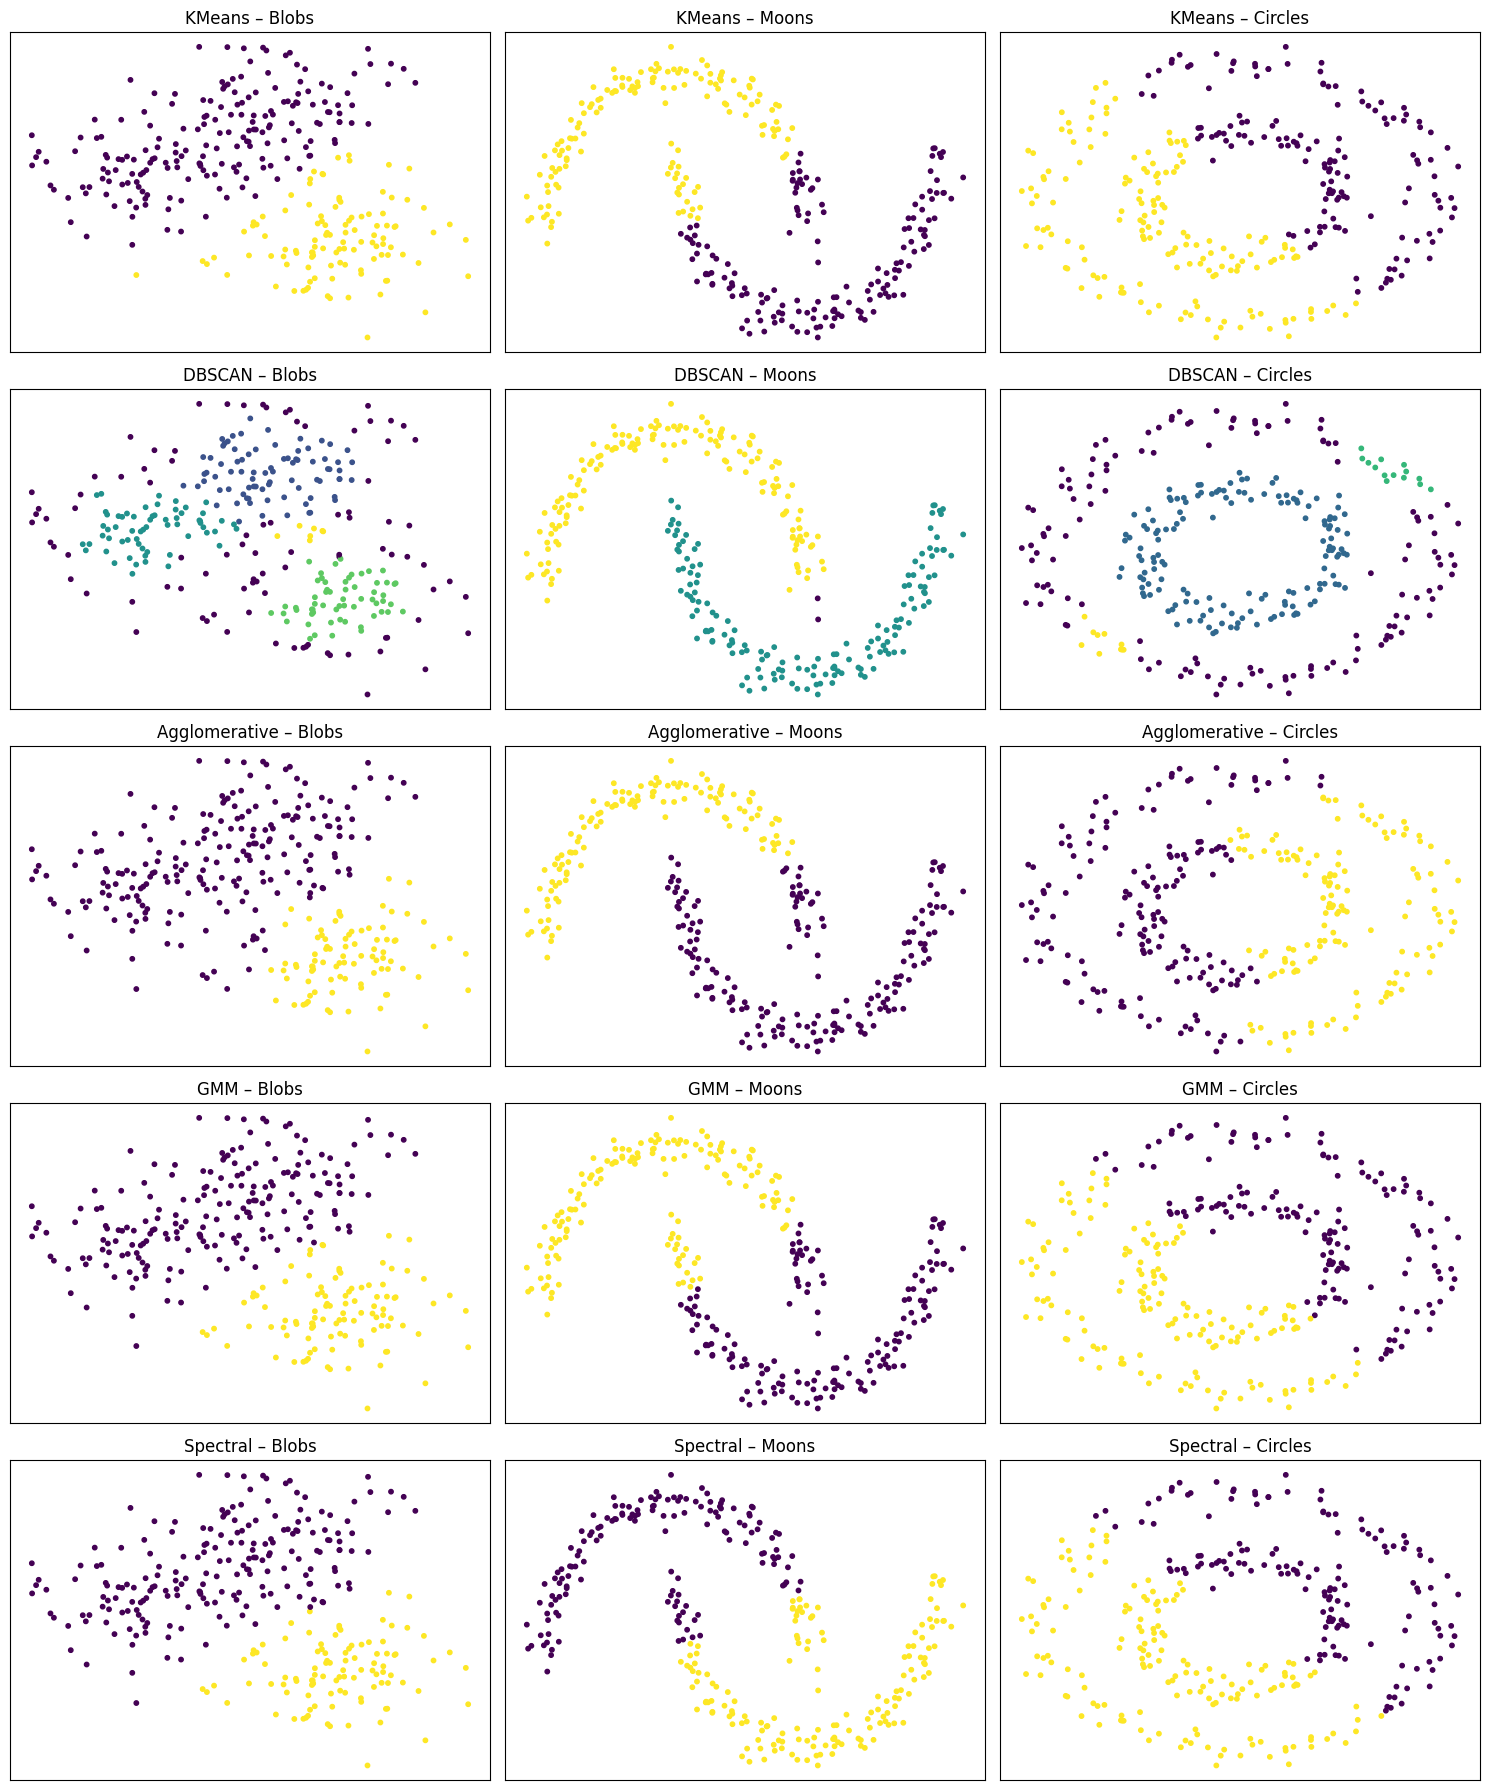

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# --- 1. Datasets ---
blobs_X, _ = datasets.make_blobs(n_samples=300, centers=3, random_state=0)
moons_X, _ = datasets.make_moons(n_samples=300, noise=0.07, random_state=0)
circles_X, _ = datasets.make_circles(n_samples=300, noise=0.07, factor=0.5, random_state=0)

datasets_list = [
    ("Blobs", blobs_X),
    ("Moons", moons_X),
    ("Circles", circles_X)
]

methods = ["KMeans", "DBSCAN", "Agglomerative", "GMM", "Spectral"]

plt.figure(figsize=(15, 18))

for col_idx, (ds_name, X) in enumerate(datasets_list):
    standardscaler = StandardScaler()
    X_scaled = standardscaler.fit_transform(X)

    # Przygotowanie etykiet metod
    # --- KMeans ---
    k_means = KMeans(n_clusters=2, n_init=10)
    kmeans_labels = k_means.fit_predict(X_scaled)

    # --- DBSCAN ---
    dbscan = DBSCAN(eps=0.3, min_samples=10)
    dbscan_labels = dbscan.fit_predict(X_scaled)

    # --- Agglomerative ---
    agg = AgglomerativeClustering(n_clusters=2)
    agg_labels = agg.fit_predict(X_scaled)

    # --- GMM ---
    gmm = GaussianMixture(n_components=2)
    gmm_labels = gmm.fit_predict(X_scaled)

    # --- Spectral ---
    spectral = SpectralClustering(n_clusters=2)
    spectral_labels = spectral.fit_predict(X_scaled)

    results = [
        ("KMeans", kmeans_labels),
        ("DBSCAN", dbscan_labels),
        ("Agglomerative", agg_labels),
        ("GMM", gmm_labels),
        ("Spectral", spectral_labels)
    ]

    # Rysowanie 5 wierszy × 3 kolumny
    for row_idx, (method_name, labels) in enumerate(results):
        plt.subplot(len(results), len(datasets_list), row_idx * len(datasets_list) + col_idx + 1)
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=10)
        plt.title(f"{method_name} – {ds_name}")
        plt.xticks([])
        plt.yticks([])

plt.tight_layout()
plt.show()


## Najlepsze wino

Celem zadania jest **znalezienie najlepszej kombinacji operacji przetwarzania danych i klasyfikatora** dla zbioru **Wine Quality Red**.

**Uwaga**
Komplet punktów (2pkt) otrzymasz tylko za osiągnięcie wyniku powyżej 90%.

⭐️ W każdej grupie trzy osoby, które otrzymają najlepszy wynik do końca trwania ćwiczeń, otrzymają punkt bonusowy. Ten sam punkt otrzyma kada osoba, która pżekroczy próg 96%.

---

#### Opis zadania

1. Wczytaj zbiór danych **Wine Quality Red** z OpenML (`data_id=41116`).
2. Zamień etykiety jakości wina na **klasyfikację binarną**: dobra (>=6) / słaba (<6).
3. Podziel dane na zbiór treningowy i testowy.
4. Na początek zastosuj **baseline**:

   * bez skalowania,
   * bez redukcji wymiarów,
   * prosty klasyfikator, np. `RandomForestClassifier(n_estimators=100)`.
     Oblicz dokładność i classification_report.
5. Następnie stwórz **pipeline**.
6. Porównaj wyniki z baseline i wybierz najlepszą kombinację parametrów, którą uważasz za optymalną.
7. Zapisz wyniki i wnioski: które kombinacje poprawiają dokładność, a które pogarszają.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import *



# 1. Wczytanie danych
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=";")
X = data.drop("quality", axis=1)
y = (data["quality"] >= 6).astype(int)  # binarna klasyfikacja: dobra (1) / słaba (0)

# 2. Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(X_train.shape)
print(X_train.head())
print(y_train.head())

# 3. Baseline: RandomForest
baseline_clf = RandomForestClassifier(n_estimators=10, random_state=42)
baseline_clf.fit(X_train, y_train)
y_pred = baseline_clf.predict(X_test)

# 4. Ewaluacja
print("=== Najprostszy Baseline ===")
print(f"Dokładność: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# 5. Twoje roziwązanie z Pipeline
# pipe = Pipeline(steps=[
#     ('Scaler', StandardScaler()),
#     ('PCA', PCA()),
#     ("SVC", SVC()),
# ])
pipe = Pipeline(steps=[
    ('Scaler', RobustScaler()),
    # ('PCA', PCA()),
    ("RF", ExtraTreesClassifier(max_depth=None, min_samples_split=2)),
])

pipe.fit(X_train, y_train)

# Uzupełnij i porównaj z baseline
y_pred = pipe.predict(X_test)
print("=== Pipeline ===")
print(f"Dokładność: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


(1119, 11)
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1278            8.0             0.715         0.22            2.30      0.075   
489             9.3             0.390         0.40            2.60      0.073   
1186            6.6             0.800         0.03            7.80      0.079   
731             8.9             0.875         0.13            3.45      0.088   
843             7.1             0.685         0.35            2.00      0.088   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1278                 13.0                  81.0  0.99688  3.24       0.54   
489                  10.0                  26.0  0.99840  3.34       0.75   
1186                  6.0                  12.0  0.99630  3.52       0.50   
731                   4.0                  14.0  0.99940  3.44       0.52   
843                   9.0                  92.0  0.99630  3.28       0.62   

      alcohol  
1278      9.5  
489    

# ⭐️ Oczyszczanie obrazów cyfr

Celem zadania jest **przetestowanie metod denoisingu obrazów cyfr** przy użyciu klasycznego PCA i Kernel PCA. Będziesz pracować na zbiorze **USPS digits**, który zawiera obrazy 16×16 pikseli przedstawiające cyfry 0–9.

## **Kilka wyjaśnień:**

* **PCA (Principal Component Analysis)**: klasyczna metoda redukcji wymiarów, która znajduje główne kierunki wariancji w danych. W denoisingu obrazy są przybliżane przez wybrane komponenty, co pozwala odfiltrować szum.

* **Kernel PCA**: rozszerzenie PCA, które działa w **przestrzeni cech nieliniowych** dzięki funkcji jądra (`kernel`). Dzięki temu metoda może uchwycić bardziej złożone, nieliniowe struktury w danych, co czasem pozwala na lepsze oczyszczenie szumu.

* **`inverse_transform`**: metoda, która pozwala **odtworzyć pierwotne dane** z przestrzeni zredukowanych cech. W PCA i Kernel PCA możemy więc zamienić reprezentację niskowymiarową z powrotem na obraz w oryginalnej przestrzeni pikseli.

---

# **Twoje zadania**

1. **Wczytaj dane USPS** i przeskaluj je do zakresu (0, 1).
2. **Podziel dane** na zbiór treningowy i testowy.
3. **Dodaj szum gaussowski** do obu zbiorów, tworząc wersje zaszumione.
4. **Wyświetl przykładowe obrazy** oryginalne i zaszumione, aby zobaczyć efekt szumu.
5. **Naucz PCA i Kernel PCA** na zaszumionych obrazach treningowych.
6. **Zrekonstruuj obrazy testowe** używając `inverse_transform` i oblicz MSE (Mean Squared Error).
7. **Porównaj wizualnie i ilościowo** jakość rekonstrukcji i napisz krótkie wnioski.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA

# -----------------------------
# 1. Wczytanie i przygotowanie danych
# -----------------------------
X, y = fetch_openml(data_id=41082, as_frame=False, return_X_y=True)
print(X.head())
# X =
"""
# -----------------------------
# 2. Podział na zbiór treningowy i testowy
# -----------------------------
X_train, X_test, y_train, y_test = # Uzupełnij (test size 100)

# -----------------------------
# 3. Dodanie szumu
# -----------------------------
rng = np.random.RandomState(0)
X_train_noisy = X_train + rng.normal(scale=0.25, size=X_train.shape)
X_test_noisy = X_test + rng.normal(scale=0.25, size=X_test.shape)

# -----------------------------
# 4. Funkcja pomocnicza do wizualizacji obrazów
# -----------------------------
def plot_digits(X, title):
    # Wyświetla 100 obrazów w siatce 10x10.
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((16, 16)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=16)
    plt.show()

# -----------------------------
# 5. Wyświetlenie przykładowych obrazów
# -----------------------------
plot_digits(X_test, "Uncorrupted test images")
mse_noisy = np.mean((X_test - X_test_noisy) ** 2)
plot_digits(X_test_noisy, f"Noisy test images\nMSE: {mse_noisy:.2f}")

# -----------------------------
# 6. Nauczenie PCA i Kernel PCA
# -----------------------------
pca = # Uzupełnij
kernel_pca = # Uzupełnij

pca.fit(X_train_noisy)
kernel_pca.fit(X_train_noisy)

# -----------------------------
# 7. Rekonstrukcja obrazów testowych
# -----------------------------
X_reconstructed_pca = # Uzupełnij
X_reconstructed_kernel_pca = # Uzupełnij

# -----------------------------
# 8. Wyświetlenie wyników i MSE
# -----------------------------
plot_digits(X_test, "Uncorrupted test images")
plot_digits(
    X_reconstructed_pca,
    f"PCA reconstruction\nMSE: {np.mean((X_test - X_reconstructed_pca) ** 2):.2f}",
)
plot_digits(
    X_reconstructed_kernel_pca,
    f"Kernel PCA reconstruction\nMSE: {np.mean((X_test - X_reconstructed_kernel_pca) ** 2):.2f}",
)
"""

URLError: <urlopen error [Errno 111] Connection refused>